<h1 style="text-align: center"><b> Bachelor of Ecole Polytechnique </b></h1>
<h2 style="text-align: center"> MAA209 - A First Step in Numerical Optimization </h2>

<h3 style="text-align: center"> Author: Vrushank Agrawal </h3>

In [2]:
# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # plotting library
import numpy as np              # package for scientific computing  
from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
import scipy as sc
import scipy.signal as scsig
plt.rcParams['figure.dpi']= 100  # parameter for resolution of graphics
from ipywidgets import *
from mpl_toolkits.mplot3d import Axes3D  
import random
import scipy.optimize as scopt

### Theoretical Questions

**Question 1)**

The given method is a zero-order method. Now, we know from the course notes (pages 17-18) that the maximum precision that can be given by a zero-order method, is of the order of $\sqrt\epsilon$ where $\epsilon$ is the machine precision number. In this case, the machine precision is of the magnitude $1e-16$ hence, the maximum precision that can be achieved is $1e-8$. This begs the question on the validity of the author's claim which cannot be accepted.

**Question 2)**

No, the **Newton method** does not converge for any initialization of $x$*. We know from the course notes that for convergence using Newton method, the algorithm needs to satisfy the condition $|x_0|<1$.

We can verify this condition through an example for the function $f(x) = \sqrt {1 + x^2}$, where the minimum is reached at $x^*=0$. We have:

$$f''(x) = \frac{1}{(1+x^2)^{3/2}} > 0$$

$$x_{i+1} = x_i - \frac{f'(x_i)}{f''(x_i)} = x_i - (1+x_i^2)x_i = -x_i^3$$

In this example, we can clearly see that the Newton's method only converges for $|x_0| <1$.

Now, for gradient descent with **Wolfe linear-search**, we know $f$ is a convex, unimodal function, with a unique minumum on the defined interval, so it must be bounded from below. Therefore, as we have studied in the course notes (page 45), it is certain that the gradient descent will converge to a local minimizer regardless of the starting point.

**Question 3)** 
- **a)** In general, **ill-conditioning** is the main problem when using GD in higher dimensions. Essentially, the algorithm takes the wrong optimization paths. Let's assume for argument sake that the distance on the high modulus directional derivatives is low and the distance on the low modulus directional derivatives is high. Now, if we use a high descent step, then we may not converge on the high modulus directions because the distance is too low. Contrastingly, if we use a low descent step, then we will converge very slowly (or maybe not) because of the high distance on the low modulus directions (Quadratic ill-conditioned problem in lecture 3). <br><br>

- **b)** For the given smooth function $f$, with a unique global minimum and $\nabla f(x_0) = (10^6, 10^{-6})$, **we can say with surity that it is ill-conditioned**. This is so because a small change in $x$ will lead to a big change in $f$ since the components of the gradient are many orders of magnitude apart. Hence the Gradient Descent Algorithm will most likely traverse the optimization paths in the wrong coordinates and hence, not work well.


- **c)** We know $A$ has dimension 2 and positive  eigenvalues therefore, A is a positive-definite matrix. Now from the course notes (pages 47-49), we have for Condition number and Convergence ratio of A: <br><br>
$$Q = \frac{|\lambda_{max}|}{|\lambda_{min}|} = \frac{2000}{0.01} = 200,000$$<br><br>
$$ (\frac {Q-1}{Q+1})^2 = (\frac {200000-1}{200000+1})^2 = (\frac {199999}{200001})^2 \approx 0.99998 \approx 1$$<br><br>
In general, GD algorithm, converges to a local minimum regardless of the initialization. In practice this may not happen because the number of iterations to reach the desired precision might be too large. Here, the condition number and the convergence-ratio are relatively very large and the speed of convergence is dictated by the condition number. Hence, the gradient descent algorithm will converge very slowly in this case.

**Question 4)**

Let us take a function $f$ which is explicit and its Hessian matrix full where, $dim(f) = 100,000$. Since we have that the Hessian matrix of $f$ is full, the space complexity of the function is very high. From the course notes (page 56), we have that $D^2f(x_i)^{-1}\nabla f(x_i)$ implies the resolution of a linear system which is very costly for a large number of variables. Moreover, inverting the matrix is of the Order $O(n)^3$ for Newton's method which is very expensive considering the dimensions in this case.

Essentially, using the Newton's Method to minimize $f$ would use too much space in the memory and also too much time and that is overall very inefficient.

**Question 5)**
- **a)** From the course notes (page 74), we know that CG Algorithm is an iterative method that costs $O(n)$ times the complexity of the product $A\cdot d_i$ per iteration. Here, $A$ is tridiagonal and because multiplication costs $O(n)$, the complexity of the CG algorithm will be $O(n^2)$. This can be verified by noting that since A is tridiagonal, we only need one index, so, we will have have two for-loops, one for dimension and another for index.


- **b)** From the results in the course notes (page 72), we know that if there are $k \leq n$ distinct eigenvalues, then the CG converges in $k$ iterations. Hence, 100 iterations are required for CG to converge in this case.

**Question 6)**

We have the problem
$$\min_{\substack{g_i(x,y,z)=1}} f(x, y, z)$$


where $ f(x,y,z)=x^2 + y^2 + z^2 $

$g_1(x,y,z) = 2x+3y-z$

$g_2(x,y,z) = 5x-y+z$.

Now, these constraints can be rewritten in matrix form as:

$$ \begin{pmatrix}2 & 3 & -1 \\ 5 & -1 & 1\end{pmatrix} \begin{pmatrix}x \\ y \\ z\end{pmatrix} = \begin{pmatrix}1 \\ 1\end{pmatrix}$$

Essentially, we can use Lagrange multipliers to solve the given problem and hence, it does have a solution.

Now, we can observe that the given constraints $(g_1,g_2)$ are $C^1$ and their gradient vectors ($(2,3,-1)$ and $(5, -1, 1)$) are linearly independent, and therefore, as we have seen in the course notes (page 90), the constraints are qualified and it is possible to write the optimality condition in the given case.

**Question 7)**

We have,
$$f(x,y) = x^2 + y^2$$

$$g_1(x, y) = x+y-1 \leq 0 \;\;\;\;\; g_2(x, y) = y-x-1 \leq 0$$

By analysing the function, it is straightforward to see that $x^2+y^2$ is bounded from below by $0$ and $(x^*, y^*) = (0,0)$ satisfies both constraints: $g_1 = -1 ≤ 0$, $g_2 = -1 ≤ 0$. Hence, it is the optimal solution.

Now, although the given constraints are inactive because $g_i(x^*, y^*) = -1 \neq 0$, we can still write the optimality conditions at the optimum because the constraints are affine. Let us define $L$ as:

$$L((x,y), \mu_1, \mu_2) = f(x,y) + \mu_1 g_1(x,y) + \mu_2 g_2 (x,y)$$

$$\frac {\partial L(x,y)}{\partial x} = 2x + \mu_1 - \mu_2 \;\;\;\;\;\; \frac {\partial L(x,y)}{\partial y} = 2y + \mu_1 + \mu_2$$

By fixing $\nabla L(x^*,y^*) =0$, we get:

$$(\mu_1 - \mu_2, \mu_1 + \mu_2) = (0,0) \implies \mu_1 = 0 = \mu_2 \implies \mu ^* = 0$$

Finally, we get that the constraint is inactive and $\mu^* = 0$, and because we have satisfied all requirements from the Kuhn-Tucker theorem (pages 93-94), we can conclude that the optimality condition computed above holds.

**Question 8)** 

From course notes (page 103), we get the following motivations for our algorithms: 

- **i)** In the given case, we know the Hessian matrix therefore we should use **Newton's Method** which is superior to gradient descent algorithms. Newton's method is slower in general, but in this case the matrix is tridiagonal and the dimension is not very high, hence, it will converge in an acceptable amount of time.


- **ii)** In the given case, N is very large and the matrix can be safely assumed to be close to full. Hence we should use Gradient Descent algorithms. If we use BFGS, we will use a lot of memory for the variables therefore, it is wise to use **L-BFGS** to respect the memory requirements.


- **iii)** We only have access to function values, hence, we need to use a derivative-free method for the optimization. Now **Golden Search** is the best derivative-free method and therefore we will use that.


- **iv)** The function is represented as sum of squares of $C^1$ functions, therefore, we should use **Gauss-Newton** method which can efficiently fit a model for non-linear least squares function like in this case.

<h3> Problem 1: Unconstrained and Constrained optimization </h3>

**Part A – Global optimization of an oscillating function**

The given function $f$ is defined on $\mathbb{R}^2$
$$f(x,y) = e^{\sin{(50x)}} + \sin{(60e^y)} + \sin{(70\sin{x})} + \sin{(\sin{(80y)})} - \sin{(10(x+y))} + \frac{x^2 + y^2}{4} \;\;\;\; (1)$$ 

**Question 1)**

First of all, it is interesting to notice that apart from the last subfunction $f_6 = \frac {x^2 + y^2}{4} \geq 0$ in $f$, all 5 previous sub-functions are oscillatory and $ f_1(x,y) \in [e^{-1}, e^1] $ while $f_{2,3,4,5}(x,y) \in [-1,1]$. 

Essentially, $\forall (x,y) \in \mathbb{R}^2, f(x, y) \geq \frac{x^2 + y^2} 4 + e^{-1} - 4$

Moreover, at infinity we have:

$$\lim_{\substack{x \rightarrow \pm \infty \\ y \rightarrow \pm \infty}} f(x,y)= + \infty$$


Hence, because $f$ is continuous, we can deduce that it reaches a global minimum $(x,y) \in \mathbb{R}^2 $.

**Question 2)**

To prove that the minimizer of $f$ lies in $(x,y) \in [-4,4]^2$, lets prove that outside of this region, $f$ is non-negative.

From the results of previous question, we have that $ \forall (x,y) \in \mathbb{R}^2, f(x,y) ≥ \frac{x^2+y^2}4 + e^{-1} - 4$

Now, we can have 4 different cases for the values of $x$ and $y$ to satisfy $x>4 \;\; \text{or} \;\; x<-4$  and  $y>4 \;\; \text{or} \;\; y<-4$. But, because we have squared terms in $f_6$, we can consider just one case with $|x|>4 \;,\; |y|>4$:

$$ f(x,y) \geq \frac {|x|^2 + |y|^2} 4 + e^{-1} - 4 \geq \frac {4^2 + 4^2} 4 + e^{-1} - 4 \geq e^{-1} + 4$$

Now, consider $f(0,0) = e^1 + sin(6)$ computed below:

In [13]:
def f(x0):    
    # get the coordinates (x,y)
    x,y = x0
    
    # evaluate all subfunctions
    f1 = np.exp(np.sin(50*x))
    f2 = np.sin(60*np.exp(y))
    f3 = np.sin(70*np.sin(x))
    f4 = np.sin(np.sin(80*y))
    f5 = np.sin(10*(x+y))
    f6 = (x**2 + y**2)/4
    
    # return the final objective function
    return f1 + f2 + f3 + f4 - f5 + f6

print("f(0, 0) = ", f([0, 0]))

f(0, 0) =  0.6951893788977833


We have, $f(0,0) \approx 0.6952 < 4 + e^{-1} \approx 4.368 $

Hence, we have shown that the function $f$ is non-negative, and greater than $e^{-1}+4$ on the interval $((-\infty, -4) \cup (4, +\infty))^2$, and also that there exits a point $(x,y) = (0,0) \in [-4,4]^2$ such that $f(x,y) < e^{-1}+4$.

Moreover, because we know that the function $f$ has a global minimum, we can conclude that the global minimizer of the function $f$ lies in $[-4,4]^2$.

**Question 3)**

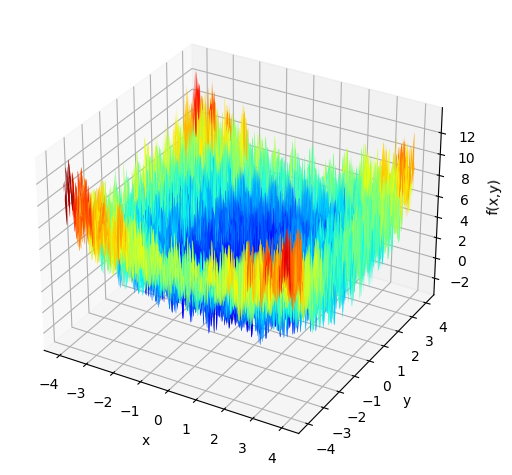

In [4]:
# assign X, Y axes on the range [-4, 4]
x = y = np.linspace(-4.0, 4.0, 2048)
X, Y = np.meshgrid(x, y)
# calculate the function values (Z axis)
Z = f([X, Y])

# create a 3D plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
# plot the axes and set labels
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

plt.show()

From the graph, one can conjecture that the global minimizer of the function lies in $[-2,2]^2$ as the function seems to bottom out as closer we get to $(0,0)$

**Question 4)**

The first 5 terms $f_1, f_2, f_3, f_4, f_5$ (subfunctions defined above) generate the oscillatory behaviour. This is mainly because of the presence of $sine$ function in all the terms which makes them periodic and also upper and lower bounded. Strictly speaking $ f_1(x,y) \in [e^{-1}, e^1] $ while $f_{2,3,4,5}(x,y) \in [-1,1]$ and all terms have very small intervals of periodicity, which explains the resulting oscillatory behaviour of the objective function.

**Question 5)**

In [5]:
def evalf(N):
    # Construct N x N grid
    x_array = y_array = np.linspace(-4.0, 4.0, N)
    # Initialize func val to max
    val = np.inf

    # Eval f at each node in the grid
    for x in x_array:
        for y in y_array:
            # Change val if new minimum found
            if f([x,y]) < val:
                val = f([x,y])
                # Store to display the final minimum coordinates
                x0, y0 = x, y
    
    print("For N =", N)
    print("The minimum         --- x_coordinate      --- y_coordinate")
    print(val, "---", x0, "---", y0)
    return (x0, y0)

# Store the coordinates of the minimum value
coords = []
for k in range(3, 11):
    # Evaluate the function over different grid sizes
    coords.append(evalf(2<<k))

For N = 16
The minimum         --- x_coordinate      --- y_coordinate
-1.4279343847476909 --- 1.333333333333333 --- 1.8666666666666663
For N = 32
The minimum         --- x_coordinate      --- y_coordinate
-2.5110320894042895 --- -1.161290322580645 --- 0.12903225806451601
For N = 64
The minimum         --- x_coordinate      --- y_coordinate
-2.3997838674009753 --- 0.44444444444444464 --- -0.9523809523809526
For N = 128
The minimum         --- x_coordinate      --- y_coordinate
-2.903804307934041 --- 0.3464566929133861 --- -0.09448818897637778
For N = 256
The minimum         --- x_coordinate      --- y_coordinate
-2.844951429764038 --- -0.015686274509803866 --- 0.20392156862745114
For N = 512
The minimum         --- x_coordinate      --- y_coordinate
-3.301596918690816 --- -0.023483365949119595 --- 0.2113502935420737
For N = 1024
The minimum         --- x_coordinate      --- y_coordinate
-3.2212151471811996 --- -0.027370478983382185 --- 0.20723362658846511
For N = 2048
The minimum       

We can observe the the minimum value obtained approximately decreases as the grid becomes denser and denser. 

**Question 6)**

We can choose the minimum points for each grid from the previous question and use `scipy.optimize` for the gradient descent algorithm. We choose **BFGS** as the algorithm for optimization and study the corresponding behaviour of the minimum through scatter plots.

For N: 16


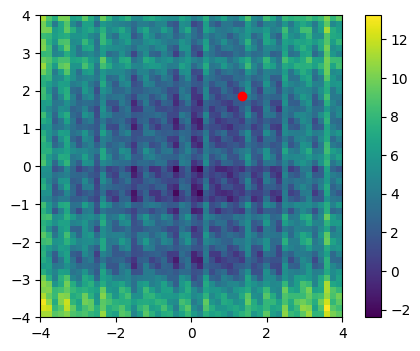

      fun: -1.5569742516759129
 hess_inv: array([[ 8.47711016e-04, -1.49862706e-06],
       [-1.49862706e-06,  6.42198025e-06]])
      jac: array([2.66134739e-05, 9.77993011e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 116
      nit: 6
     njev: 35
   status: 2
  success: False
        x: array([1.34728693, 1.86663957])


For N: 32


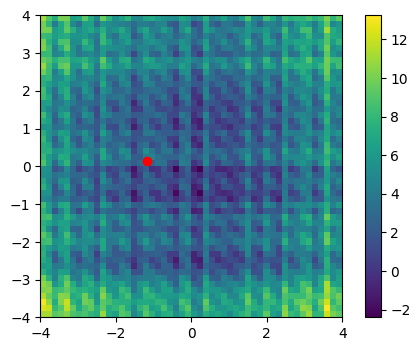

      fun: -2.5640163560585894
 hess_inv: array([[ 5.48730004e-04, -4.71628371e-06],
       [-4.71628371e-06,  1.05523123e-04]])
      jac: array([1.22189522e-06, 1.56760216e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 114
      nit: 5
     njev: 34
   status: 2
  success: False
        x: array([-1.16789658,  0.12736804])


For N: 64


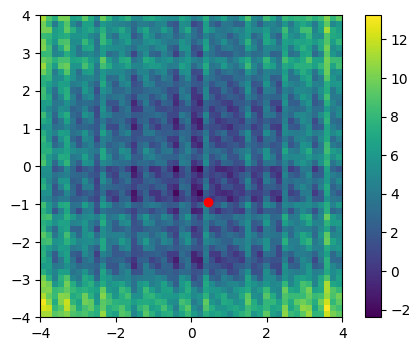

      fun: -2.5334314235079107
 hess_inv: array([[ 1.82650200e-04, -3.03433212e-06],
       [-3.03433212e-06,  2.14578319e-04]])
      jac: array([-5.36441803e-07, -8.34465027e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 5
     njev: 12
   status: 0
  success: True
        x: array([ 0.44897089, -0.9577981 ])


For N: 128


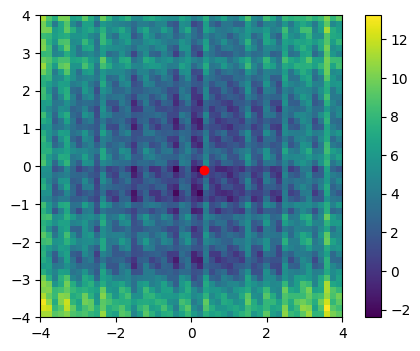

      fun: -2.952578091294118
 hess_inv: array([[ 1.87059022e-04, -1.71984964e-06],
       [-1.71984964e-06,  1.48466418e-04]])
      jac: array([2.98023224e-08, 4.17232513e-07])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 6
     njev: 13
   status: 0
  success: True
        x: array([ 0.34217878, -0.0945754 ])


For N: 256


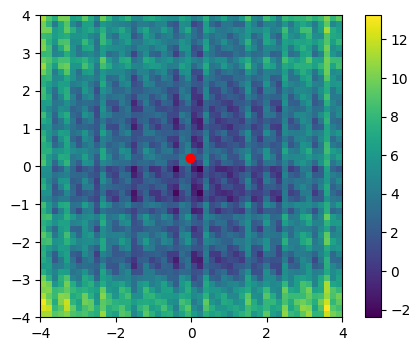

      fun: -3.306868647474805
 hess_inv: array([[ 1.69868547e-04, -2.42899489e-06],
       [-2.42899489e-06,  1.01320419e-04]])
      jac: array([ 9.83476639e-07, -5.06639481e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 7
     njev: 12
   status: 0
  success: True
        x: array([-0.02440309,  0.21061242])


For N: 512


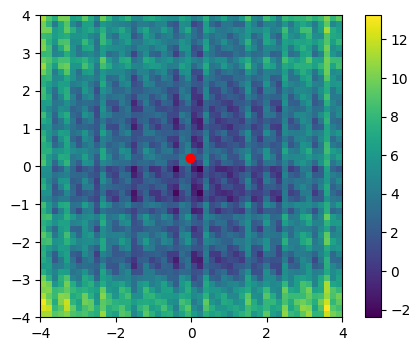

      fun: -3.306868647474811
 hess_inv: array([[ 1.67075212e-04, -1.55544118e-06],
       [-1.55544118e-06,  1.01114214e-04]])
      jac: array([8.04662704e-07, 3.27825546e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([-0.02440309,  0.21061242])


For N: 1024


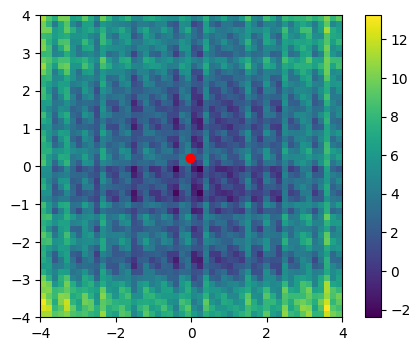

      fun: -3.3068686474747744
 hess_inv: array([[ 1.68864771e-04, -1.83264987e-06],
       [-1.83264987e-06,  1.01036130e-04]])
      jac: array([-1.54972076e-06, -2.08616257e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([-0.02440309,  0.21061242])


For N: 2048


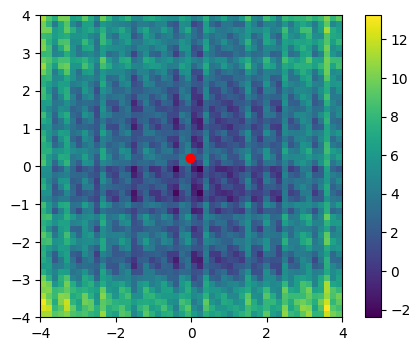

      fun: -3.306868647474806
 hess_inv: array([[ 1.67511748e-04, -1.68779709e-06],
       [-1.68779709e-06,  1.01088367e-04]])
      jac: array([-2.98023224e-08,  3.87430191e-07])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 5
     njev: 11
   status: 0
  success: True
        x: array([-0.02440309,  0.21061242])




In [6]:
# Construct grid
x = y = np.linspace(-4, 4)
x, y = np.meshgrid(x, y)
z = f([x, y])

for i, x0 in enumerate(coords):
    print("For N:", 2<<(i+3))
    
    # Optimize the function using BFGS
    x_min = scopt.minimize(f, x0, method="BFGS")

    # Plot the function in 2D
    plt.figure()
    plt.imshow(z, extent=[-4, 4, -4, 4], origin="lower")
    plt.scatter(x_min.x[0], x_min.x[1], color = 'red')
    plt.colorbar()
    plt.show()
    
    print(x_min)
    print("")
    print("")

We can observe that the minimum value and the point where it is attained varies across the different grid sizes $ < 2^8$, after which it stabilizes.

**Question 7)**

From the computations above, it can be observed that the function $f$ has a lot of variations because of its oscillatory nature over small intervals. Essentially, if the grid is not dense enough, the nodes can have more than $2$ local minima and in that case the GD algorithm may/may not converge to the global minima. It can be concluded that depending upon the initialization, we may/may not reach the global minima.

**Question 8)**

From observing the plots above, we can strongly conclude that ```-3.3068686474748032``` could be the minimum value of the function $f$ on $\mathbb{R}^2$. This claim can be supported by the fact that as we make the grid denser, the nodes start having just $1$ local minima which remains the same and the point where it is attained also remains the same hence it must be the global minima.

**Question 9)**

In [39]:
x = y = np.linspace(-4, 4)
x, y = np.meshgrid(x, y)
z = f([x, y])

def evalmax(N):
    # Construct N x N grid
    x_array = y_array = np.linspace(-4.0, 4.0, N)
    # Initialize func val to max
    val = np.inf
    
#     # Eval f at each node in the grid
#     for x in x_array:
#         for y in y_array:
#             # Change val if new minimum found
#             if f([x,y]) < val:
#                 val = f([x,y])
#                 # Store to display the final minimum coordinates
#                 x_0, y_0 = x, y

    minima = scsig.argrelextrema(z, np.less)

#     print(len(minima))
#     print(minima[:5])
    
#     print("The maximum distance between two local maxima is")
#     print(val, "---", x0, "---", y0)
#     return (x0, y0)

evalmax(2000)

We can use `scipy.signal` to evaluate the upper bound for the distance between two local maxima.

**Part B – Constrained optimization**

The given function $J$ is defined on $[0, \infty)^2$:

$$J(x,y) = \cosh(4x + y)$$

$$K_1 = \{(x,y) \in [0, \infty)^2: xy \geq 1\}$$

$$K_2 = \{(x,y) \in [0, \infty)^2: y \leq 1+x, y \geq 2-x\}$$

**Question 10)**

To prove that $K_1$ is a convex function, we need to prove 

$$
tx + (1-t)y \in K_1 \;\; \textrm{where} \;\; (x,y) \in K_1^2 \;\;\textrm{and} \;\; t \in (0,1) \\
\textrm{or} \\
(tx_1 + (1-t)y_1)(tx_2 + (1-t)y_2) \geq 1
$$

Using Cauchy-Schwarz inequality, we have:

$$
(tx_1 + (1-t)y_1)(tx_2 + (1-t)y_2) \geq \left(t\sqrt{x_1x_2} + (1-t)\sqrt{y_1y_2}\right)^2 \\
\implies (tx_1 + (1-t)y_1)(tx_2 + (1-t)y_2) \geq \left(t + (1-t)\right)^2 = 1
$$

Hence, we have proved that $K_1$ is convex.

To prove that $K_2$ is a convex function, we need to prove 

$$
tx + (1-t)y \in K_2 \;\; \textrm{where} \;\; (x,y) \in K_2^2 \;\;\textrm{and} \;\; t \in (0,1) \\
\textrm{or} \\
2 - tx_1 - (1-t)y_1 \leq tx_2 + (1-t)y_2 \leq 1 + tx_1 + (1-t)y_1
$$

Now, we have:

$$
\begin{cases}
2 - x_1 \leq x_2 \leq 1 + x_1 \\ 
2 - y_1 \leq y_2 \leq 1 + y_1
\end{cases} \\
\implies
\begin{cases}
2t - tx_1 \leq tx_2 \leq t + tx_1 \\ 
2(1-t) - (1-t)y_1 \leq y_2 \leq 1 - t + (1-t)y_1
\end{cases} \\
\textrm{(adding the equations)} \\
\implies
2 - tx_1 - (1-t)y_1 \leq tx_2 + (1-t)y_2 \leq 1 + tx_1 + (1-t)y_1
$$

Hence, we have proved that $K_2$ is convex.

To prove that $K_i$ are closed sets, we will take arbitrary sequences $(x_n, y_n)_{n\geq0} \in K_i \to (x,y)$ and prove that $(x,y) \in K_i$.

For $K_1$, let's assume $(x,y) \notin K_1 \implies xy<1$ and let $0<\varepsilon<1$ and also $\varepsilon < \frac{1-xy}{x+y+1} $. 

Now, $\exists \; n_0 \in \mathbb{N}$ such that 

$$
\sqrt{(x - x_n)^2 + (y - y_n)^2} < \varepsilon \text{ }\forall n \geq n_0 \\
\implies
\begin{cases}
|x - x_n| < \varepsilon \text{ } \forall n \geq n_0 \\
|y - y_n| < \varepsilon \text{ } \forall n \geq n_0
\end{cases} \\
\implies
\begin{cases}
x + \varepsilon \geq x_n \text{ } \forall n \geq n_0 \\
y + \varepsilon \geq y_n \text{ } \forall n \geq n_0
\end{cases} \\
\implies
(x + \varepsilon)(y + \varepsilon) \geq x_ny_n \geq 1 \\
\implies
(x+y)\varepsilon + \varepsilon^2 \geq 1 -xy
$$

But we know from the definition of $\varepsilon$,
$$
1-xy > \varepsilon(x+y+1) = (x+y)\varepsilon + \varepsilon > (x+y)\varepsilon + \varepsilon^2 \geq 1 -xy
$$

Thus, we reach a contradiction which proves that $(x, y) \in K_1$ and thus it is indeed closed.

For $K_2$, we have

$$ 2 - x_n \leq y_n \leq 1 + x_n $$

by passing the limit we get, 

$$ 2 - x \leq y \leq 1 + x $$

Hence, $(x,y) \in K_2$ and therefore, $K_2$ is also closed.

We know that 

$$cosh(x,y) = \frac {e^{(x,y)}+e^{(-x,-y)}} 2$$

and $exponential$ function is a convex function. Hence, as sum of two convex functions, $cosh$ is also a convex function. Essentially, the function $J$ is convex.

We can use the AM-GM inequality to argue that 

$$
J(x,y) = \frac{e^{4x + y} + \frac{1}{e^{4x + y}}}{2} \geq \sqrt{e^{4x + y}\frac{1}{e^{4x + y}}}= 1
$$

This means that the $J$ is bounded from below by $1$ and because it is a continuous function, it must admit minimizers on both sets $K_1$ and $K_2$ which are both closed and convex.

**Question 11)**

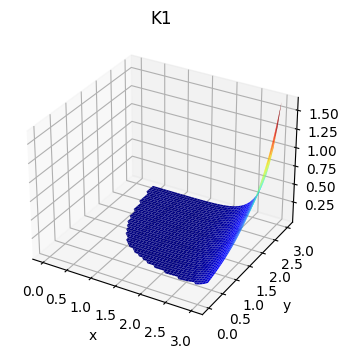

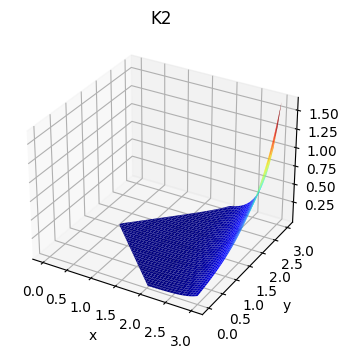

In [5]:
# define function J
def J(x,y):
    return (np.exp(4*x + y) + np.exp(-(4*x + y)))/2.

# define conditions for set K1
def K1(x,y):
    if x*y >= 1:
        return J(x,y)
    # return Nan values to leave empty for plotting
    return np.nan

# define conditions for set K2
def K2(x,y):
    if (2-x <= y) and (y <= 1+x):
        return J(x,y)
    # return Nan values to leave empty for plotting
    return np.nan
    
# We choose the upper bound of the region to be 3
x = np.linspace(0, 3)
y = np.linspace(0, 3)
X, Y = np.meshgrid(x, y)

# Plot K1
Z = np.array([[K1(u,v) for u in x] for v in y])
fig = plt.figure(1)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap="jet")
plt.xlabel('x')
plt.ylabel('y')
plt.title("K1")
plt.show()

# Plot K2
Z = np.array([[K2(u,v) for u in x] for v in y])
fig = plt.figure(2)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap="jet")
plt.xlabel('x')
plt.ylabel('y')
plt.title("K2")
plt.show()

From the plots we can conjecture that the minimizer of $K_1$ lies in $[ \frac{1} 3, 3]^2$. While, we can be precise for $K_2$ and conjecture its minimizer to be $\left(\frac{1}2, \frac{3}2 \right)$

**Question 12)**

We can approximate the solution of the given problem using AM-GM inequality. Let's take a variable very close to $1$ defined as: $ 0 << \varepsilon < 1 $ such that we have:

$$J(x,y) = \frac{1}{2}\left(e^{4x + y}\varepsilon + (1-\varepsilon)e^{4x + y} + \frac{1}{e^{4x+y}}\right)$$

Now using the inequality,

$$
(1-\varepsilon)e^{4x + y} + \frac{1}{e^{4x+y}} \geq 2 \sqrt{(1-\varepsilon)e^{4x + y}\frac{1}{e^{4x+y}}} = 2\sqrt{1-\varepsilon} \forall (x,y) \in K_1 \\
\implies 
J(x,y) \geq \frac{\varepsilon e^{4x+y} + 2\sqrt{1-\varepsilon}}{2} \forall (x,y) \in K_1 \\
$$

Now, we can have the minimizer for the set only at the equality case and for the AM-GM inquality we know that happens when the two terms being compared are equal. Now, a useful observation at this point is that

$$ e^{4x + y} \geq e^{2\sqrt{4xy}} = e^{4\sqrt{xy}} \geq e^4 \forall (x,y) \in K_1 $$

$$ \textrm{equality happens when xy=1} $$

$$ \implies J(x,y) \geq \frac{\varepsilon e^{4x+y} + 2\sqrt{1-\varepsilon}}{2} \forall (x,y) \in K_1 \\ $$

This is very important because now we can write the minimizer conditions using the two inequalities and the assumption in the previous case:

$$
\begin{cases}
4x = y \\
(1-\varepsilon)e^{4x + y} = \frac{1}{e^{4x+y}} \\
xy = 1
\end{cases}
$$

Essentially, we get that the minimizer for $J$ on $K_1$ is given by $x = (x_0,y_0) = \left(\frac{1}2, 2\right)$.

**Question 13)**

In the previous question, we accidentally showed that the minimizer of $J$ also minimizes $J_2 = 4x+y$ for the set $K_1$ while using the inequalities, hence, we need not do that here. For $K_2$, let's assume that the minimizer $(x_0,y_0)$ of $J$ doesn't minimize the function $J_2$. Hence, $\exists \; (x, y) \in K_2$ such that

$$
\begin{cases}
J(x_0, y_0) \leq J(x_1, y_1) \\
J_2(x_0, y_0) > J_2(x_1, y_1)
\end{cases}
$$

Now,

$$
\begin{align}
J(x_0, y_0) - J(x_1, y_1) &= \frac{1}2 \left( \left(e^{J_2(x_0,y_0)} + e^{-J_2(x_0,y_0)}\right) - \left(e^{J_2(x_1,y_1)} + e^{-J_2(x_1,y_1)}\right)\right) \\
&= \frac{1}2 \left( e^{J_2(x_0,y_0)} - e^{J_2(x_1,y_1)} - e^{-J_2(x_1,y_1)} + e^{-J_2(x_0,y_0)} \right) \\
&= \frac{1}2 \left( e^{J_2(x_0,y_0)} - e^{J_2(x_1,y_1)} \right) \left( 1 - \frac{e^{-J_2(x_1,y_1)} - e^{-J_2(x_0,y_0)}} {e^{J_2(x_0,y_0)} - e^{J_2(x_1,y_1)}} \right) \\
&= \frac{1} 2 \left(e^{J_2(x_0, y_0)} - e^{J_2(x_1,y_1)}\right)\left(1 - \frac{1}{e^{J_2(x_0, y_0) + J_2(x_1, y_1)}}\right)
\end{align}
$$

because $J_2(x_0, y_0) > J_2(x_1, y_1)$ and $J_2(x_0, y_0) + J_2(x_1, y_1) > 0$, we have

$$
\begin{cases}
e^{J_2(x_0, y_0)} - e^{J_2(x_1,y_1)} > 0 \\
1 - \frac{1}{e^{J_2(x_0, y_0) + J_2(x_1, y_1)}} > 0 
\end{cases}
$$

Essentially, we have shown that

$$
J(x_0, y_0) - J(x_1, y_1) > 0 \\
\implies
J(x_0, y_0) > J(x_1, y_1)
$$

Our assumption is therefore contradicted and the minimizer of $J$ indeed minimizes the function $J_2$ for $K_2$. This implies that finding the minimizer of $J$ on $K_2$ is equivalent to a linear programming problem for finding the minimizer for $4x + y$ with the constraints:

$$
\begin{cases}
-x -y \leq -2 \\
-x +y \leq 1
\end{cases}
$$

In [73]:
# matrix A
A = np.array([[-1,-1], 
              [-1,1]])

# matrix b =  ( -2 )
#             (  1 )
b = np.array([-2, 1])

# Coeff of 4x+y
c = np.array([4, 1])

# solve using linprog
min_ = scopt.linprog(c, A_ub=A, b_ub=b)

print("Hence, we get the minimizer of K2")
print("(x0, y0) = ", min_.x[0], min_.x[1])

Hence, we get the minimizer of K2
(x0, y0) =  0.5000000000002359 1.4999999999819666


**Question 14)**

We have that 

$$
\nabla J(x,y) = \frac {1}2 \begin{pmatrix}4\left(e^{4x + y} - e^{-4x - y}\right), \left(e^{4x + y} - e^{-4x - y}\right)\end{pmatrix}
$$

It is straightforward to see that $\nabla J(x,y) = 0$ if and only if $x = \frac{-y}4$ but because $(x,y) \in [0, \infty]^2$, this implies that $x=y=0$. But since $(0,0) \notin K_1$, the global minimum $(x_0,y_0) \in K_1$ of $J$ is not even a local minimum of the function $J$ in its maximal input set because  $\nabla J(x_0,y_0) \neq 0$ . $(x_0, y_0) \in K_1$ has been calculated in question 12 and is given by:

$$
(x_0, y_0) = \left(\frac{1}2, 2\right) \;\;\; \textrm{where} \;\;\;
J(x_0, y_0) = \frac{e^4 + e^{-4}}2
$$

<h2> References </h2>

- Course Notes
- Course Slides